<a href="https://colab.research.google.com/github/pkrodev/OpenCV_tutorial/blob/main/Face_database1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making directories, importing libraries and installing python packages

In [58]:
!pip install firebase
!pip install firebase-admin
!pip install deepface
!python -m deepface.models
!pip install pillow

/usr/bin/python3: No module named deepface.models.__main__; 'deepface.models' is a package and cannot be directly executed


In [59]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import firebase
import firebase_admin
from firebase_admin import credentials, db
import base64
import firebase_admin
from PIL import Image
import io
import matplotlib.pyplot as plt
from deepface import DeepFace
import os

In [60]:
folder_path = "stored-faces"

if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print("Directory created:", folder_path)
else:
    print("Directory already exist:", folder_path)


Directory already exist: stored-faces


In [61]:
folder_path = "assets"

if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print("Directory created:", folder_path)
else:
    print("Directory already exist:", folder_path)

Directory already exist: assets


In [62]:
folder_path = "face_to_detect"

if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print("Directory created:", folder_path)
else:
    print("Directory already exist:", folder_path)

Directory created: faces_to_detect


In [63]:
folder_path = "detected-faces"

if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print("Directory created:", folder_path)
else:
    print("Directory already exist:", folder_path)

Directory already exist: detected-faces


# Face collecting and uploading to firebase realtime database

In [64]:
img1 = cv2.imread('assets/pic1.jpg')

In [65]:
img2 = cv2.imread('assets/pic1.jpg', 0)

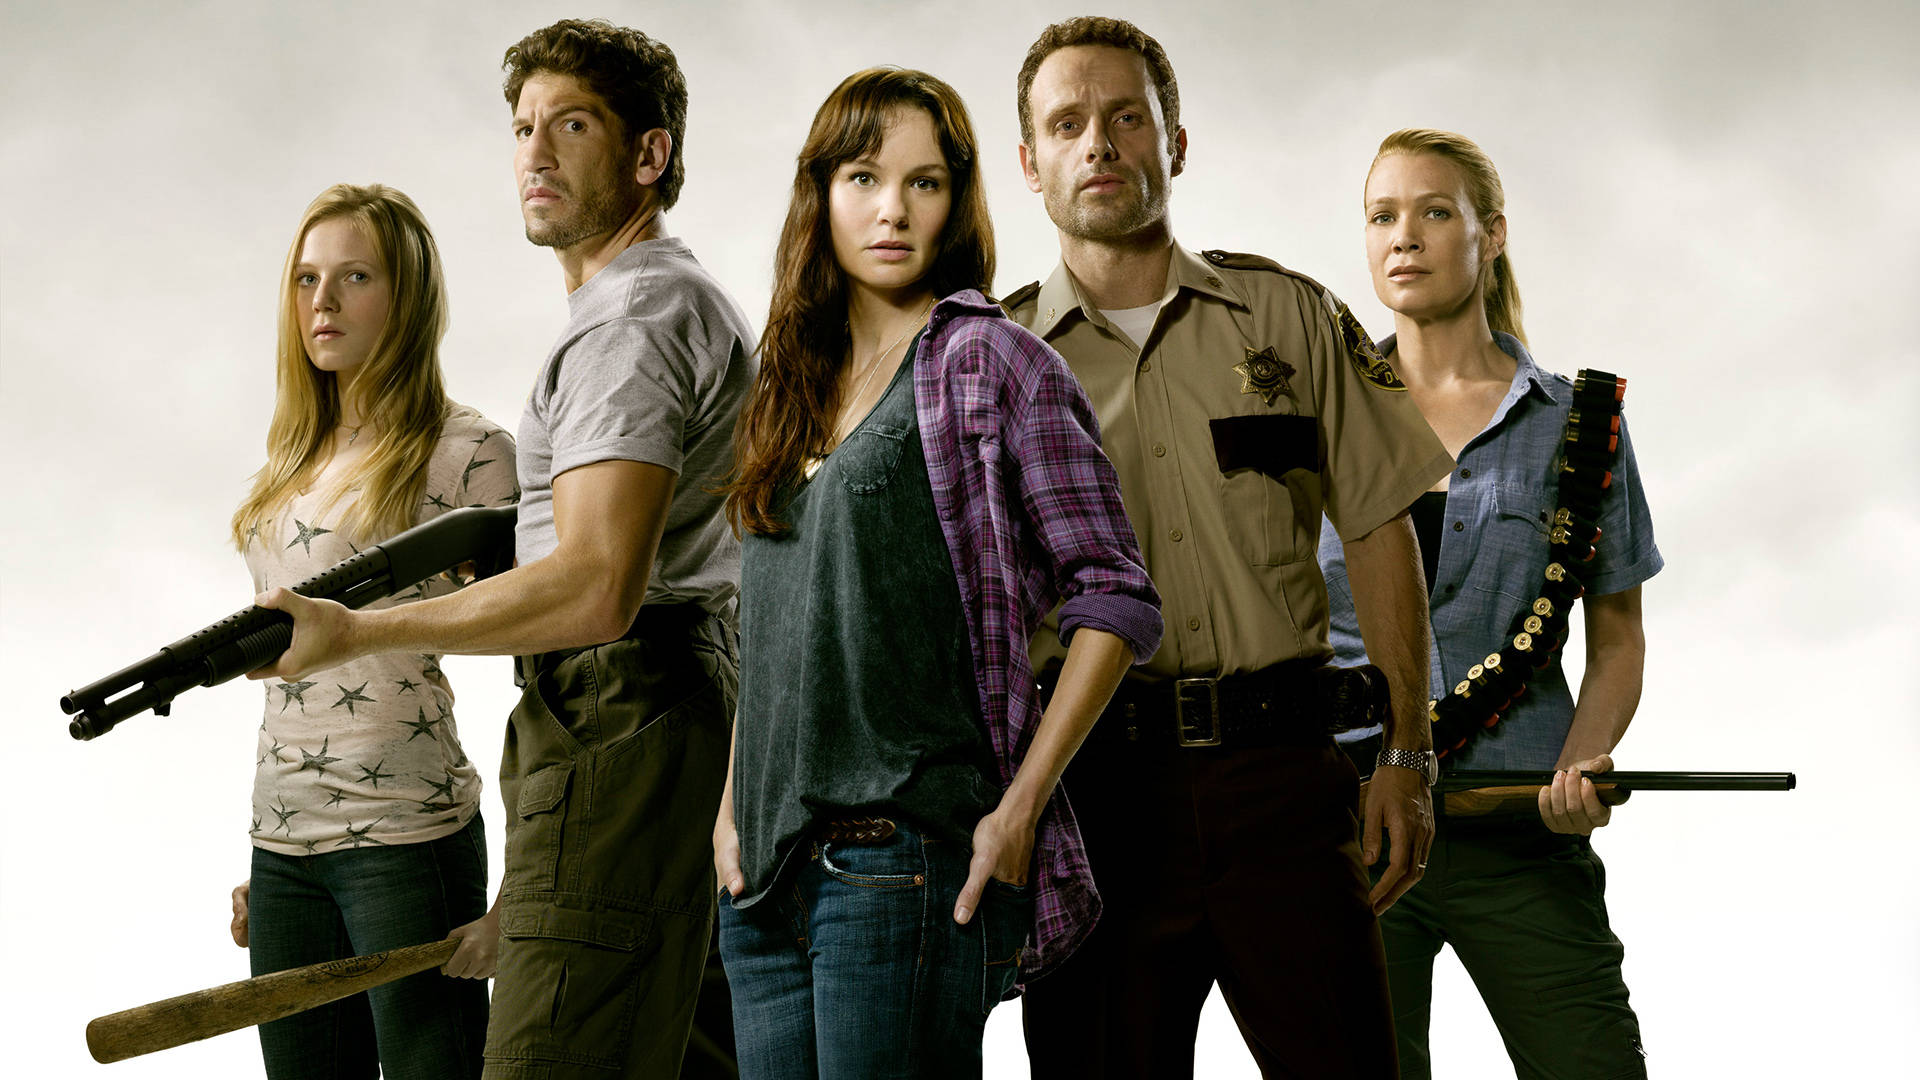

In [66]:
cv2_imshow(img1)

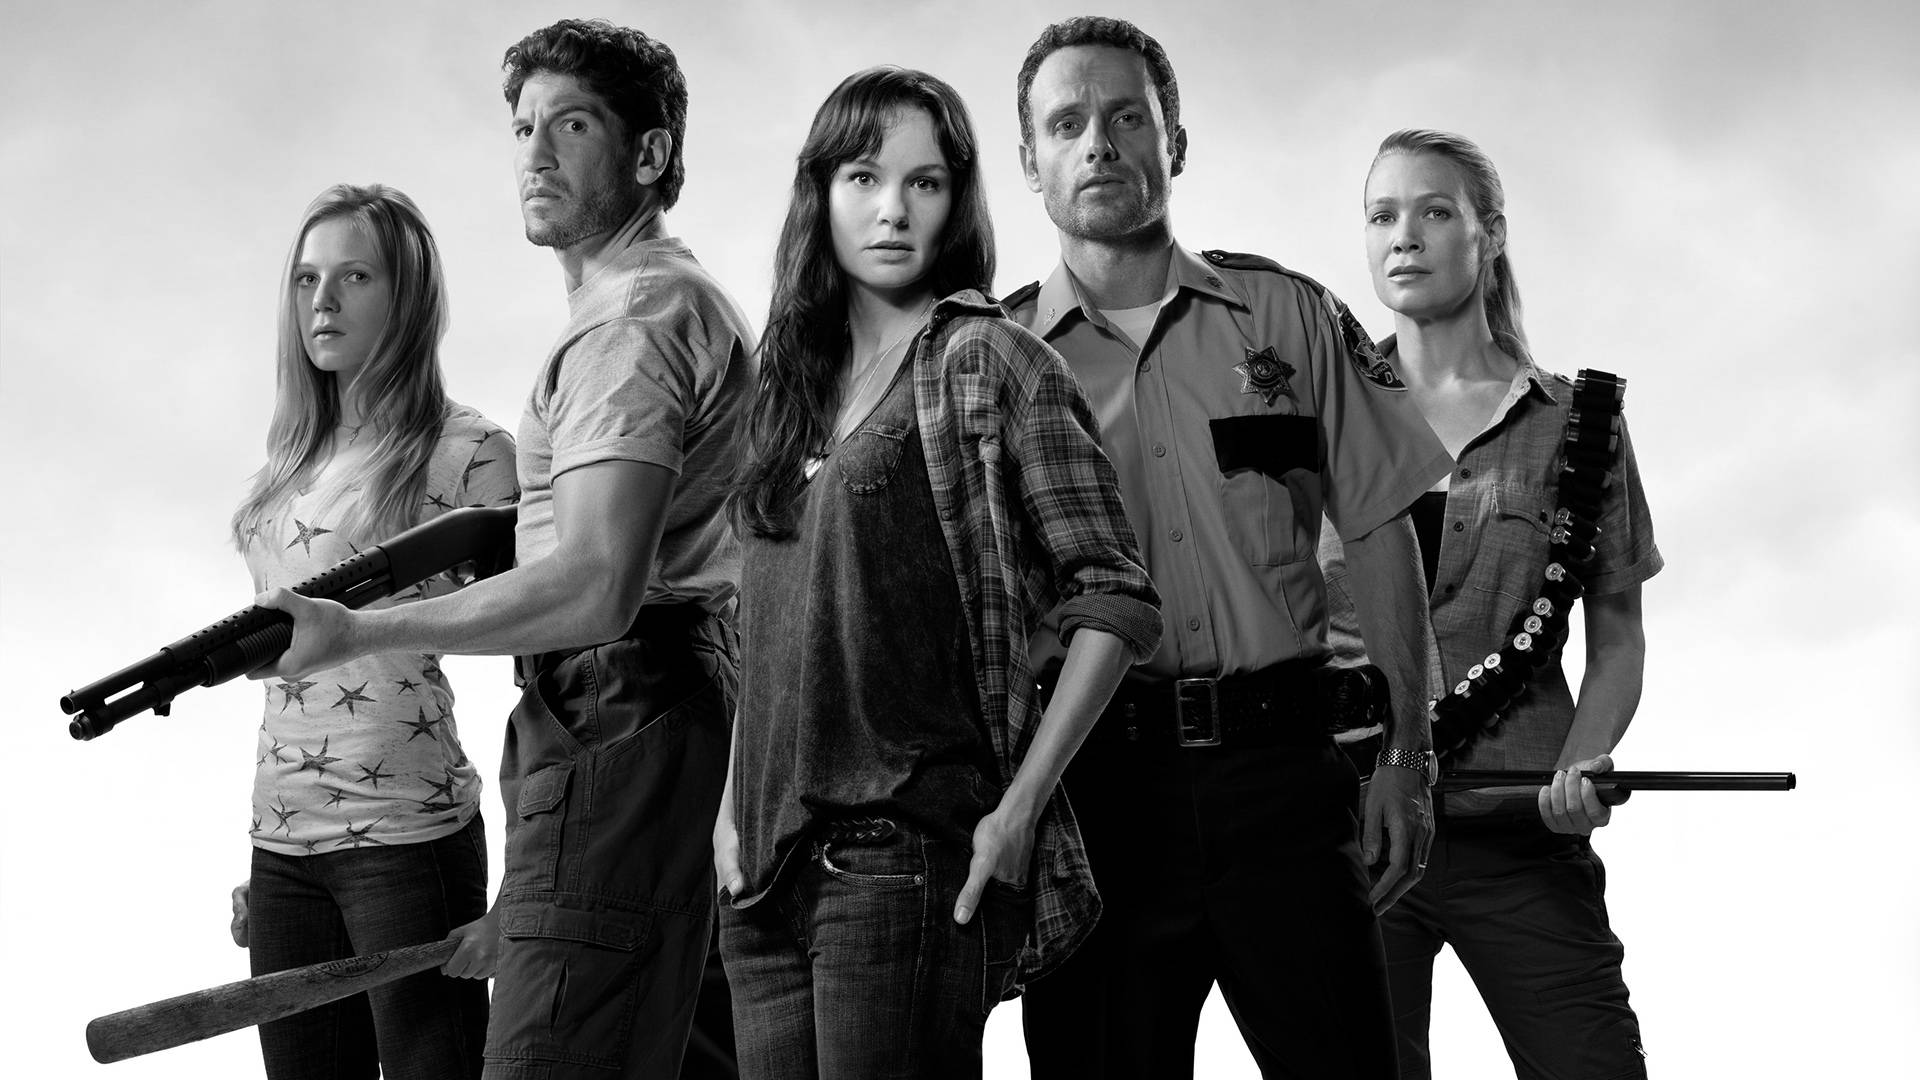

In [67]:
cv2_imshow(img2)

In [68]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [69]:
faces = face_cascade.detectMultiScale(img2, scaleFactor=1.05, minNeighbors=10, minSize=(80, 80), maxSize=(190, 150))
img1 = cv2.imread('assets/pic1.jpg')
for (x, y, w, h) in faces:
    cv2.rectangle(img1, (x, y), (x + w, y + h), (255, 0, 0), 5)
    roi_gray = img2[y:y+w, x:x+w]
    roi_color = img1[y:y+h, x:x+w]




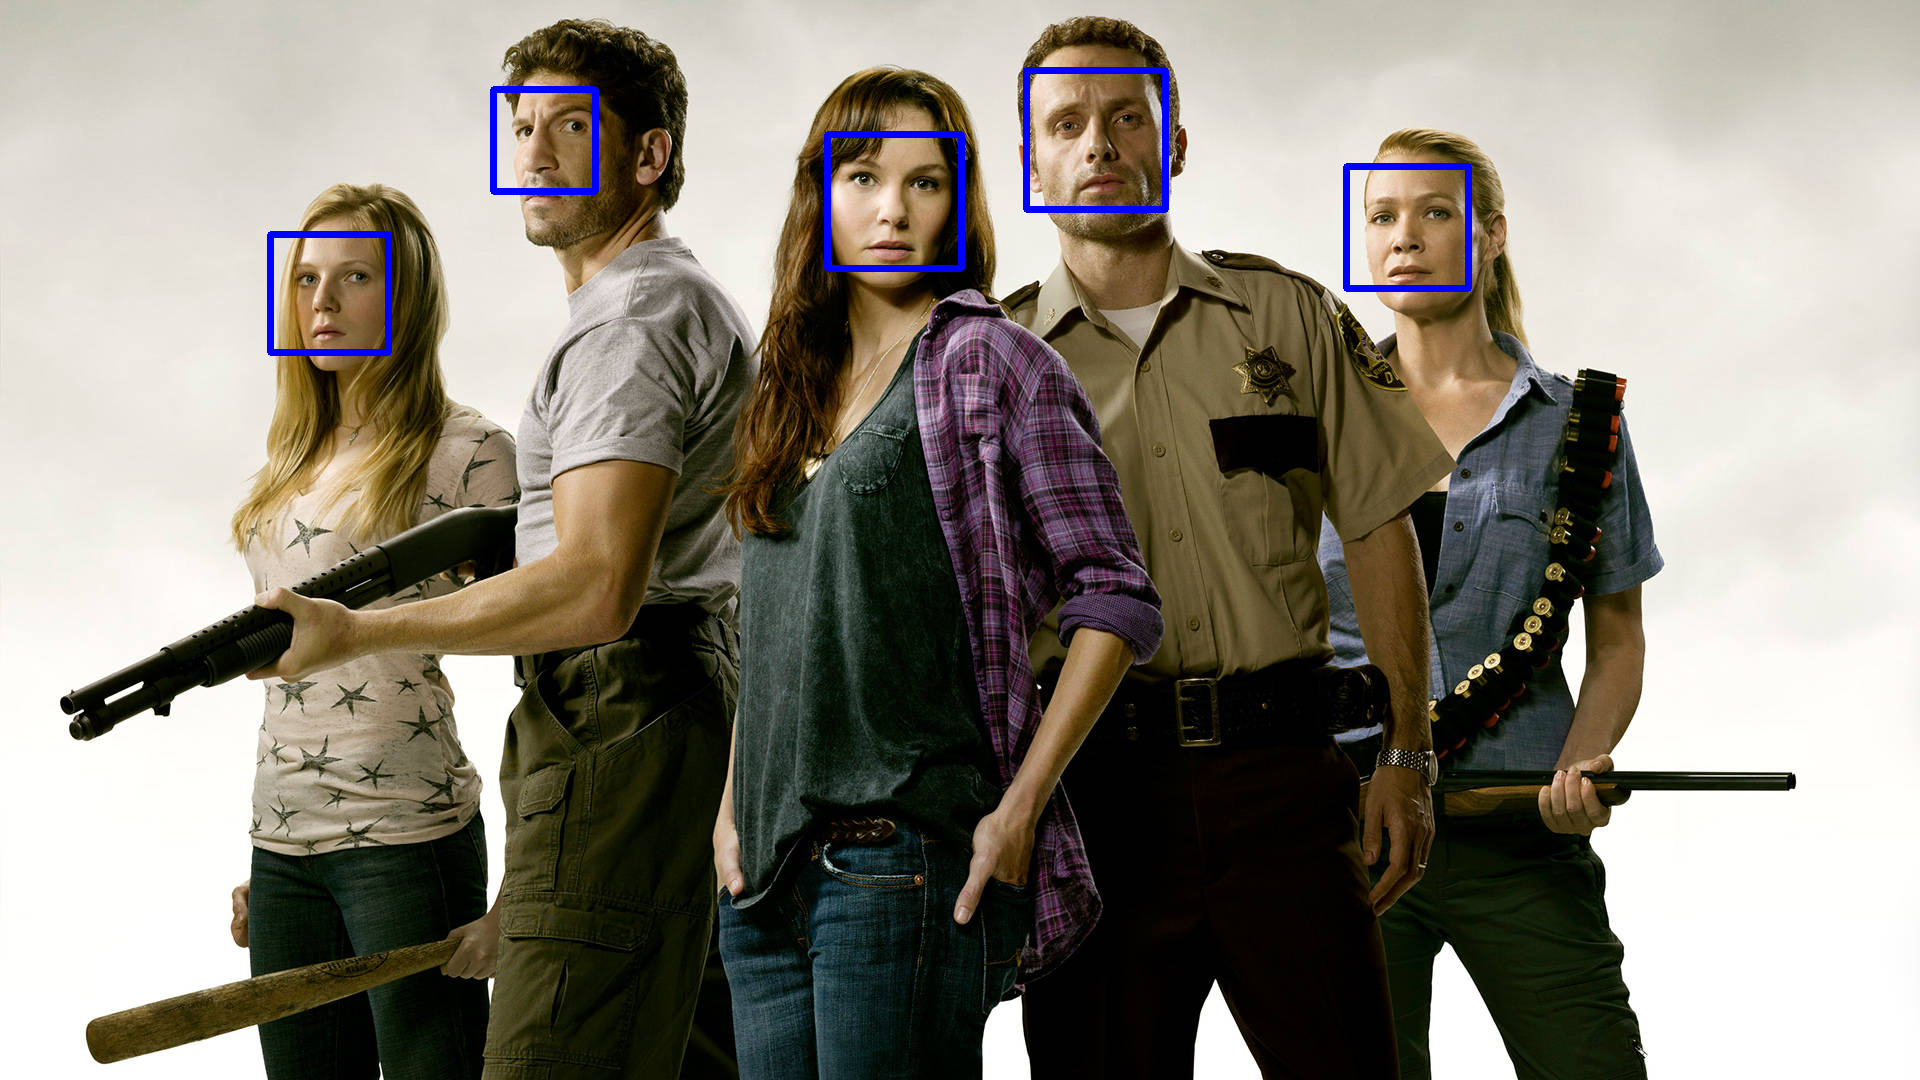

In [70]:
cv2_imshow(img1)

In [71]:
img1 = cv2.imread('assets/pic1.jpg')

In [72]:
i=0
for x, y, w, h in faces:
    cropped_image = img1[y-60 : y + h+90, x-90 : x + w+90]
    target_file_name = 'stored-faces/' + str(i) + '.jpg'
    cv2.imwrite(
        target_file_name,
        cropped_image,
    )
    i = i + 1;

In [73]:
cred = credentials.Certificate("/content/face-database1-firebase-adminsdk-thoie-8494829194.json")
firebase_admin.initialize_app(cred, {
    'databaseURL': "https://face-database1-default-rtdb.europe-west1.firebasedatabase.app"
})



ValueError: The default Firebase app already exists. This means you called initialize_app() more than once without providing an app name as the second argument. In most cases you only need to call initialize_app() once. But if you do want to initialize multiple apps, pass a second argument to initialize_app() to give each app a unique name.

In [74]:
ref = db.reference('/')
stored_faces= "/content/stored-faces/"
files = os.listdir(stored_faces)
counter=1
for idx, faces in enumerate(files, start=1):
  with open("/content/stored-faces/"+faces, "rb") as image_file:
      image_data = image_file.read()

  image_base64 = base64.b64encode(image_data).decode()

  custom_key = 'photo'
  data = {
      f'data{idx}': image_base64
  }

  ref.child(custom_key).child(f'data{idx}').set(image_base64)
  counter+=1


In [75]:
photo_data = ref.child('photo').get()
if photo_data:
    amount_of_data=len(photo_data)
    print("Amount of data under 'photo' key:", amount_of_data)
else:
    print("No data under 'photo' key")

Amount of data under 'photo' key: 5


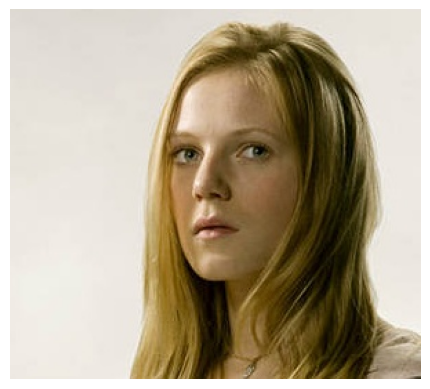

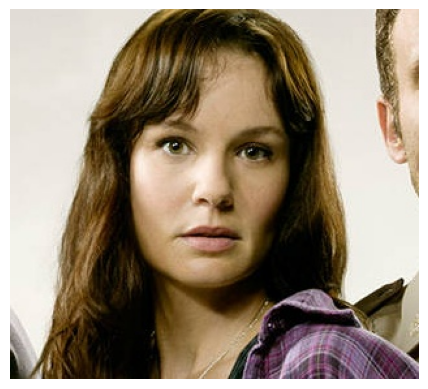

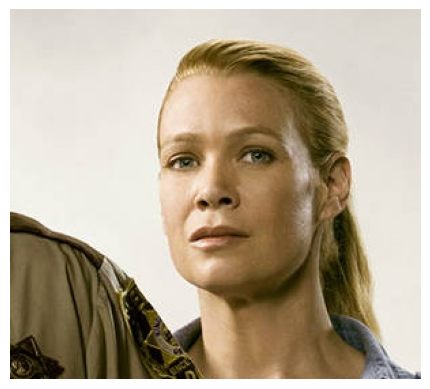

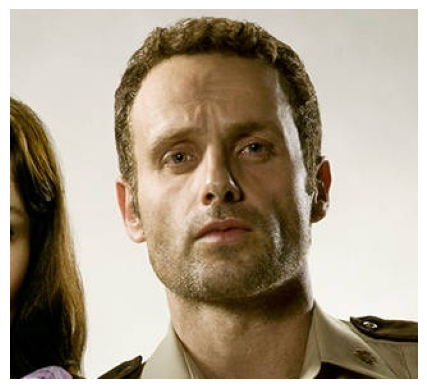

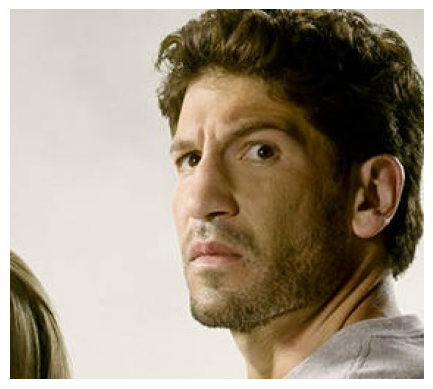

In [76]:
ref = db.reference('/')
for i in range(amount_of_data):
  image_data_base64 = ref.child('photo').child('data'+str(i+1)).get()
  image_data = base64.b64decode(image_data_base64)
  img = Image.open(io.BytesIO(image_data))
  plt.imshow(img)
  plt.axis('off')
  plt.show()

# Comparison with DeepFace

In [ ]:

result = DeepFace.verify(img1_path="/content/stored-faces/4.jpg", img2_path="/content/detected-faces/Amy.JPG", enforce_detection=False)

print(result)

In [ ]:

result = DeepFace.verify(img1_path="/content/detected-faces/Rick.jpg", img2_path="/content/stored-faces/3.jpg", enforce_detection=False)

print(result)

In [ ]:

result = DeepFace.verify(img1_path="/content/detected-faces/Lori.JPG", img2_path="/content/stored-faces/2.jpg", enforce_detection=False)

print(result)

In [ ]:
result = DeepFace.verify(img1_path="/content/detected-faces/Andrea.JPG", img2_path="/content/stored-faces/1.jpg", enforce_detection=False)

print(result)

In [ ]:
result = DeepFace.verify(img1_path="/content/detected-faces/Shane.JPG", img2_path="/content/stored-faces/0.jpg", enforce_detection=False)

print(result)

In [ ]:
print(result['verified'])

False
True
True
False
False
False
False
False
False
False
True
True
False
False
True
True
False
False
True
True
False
False
False
False
False
False
False
False
False


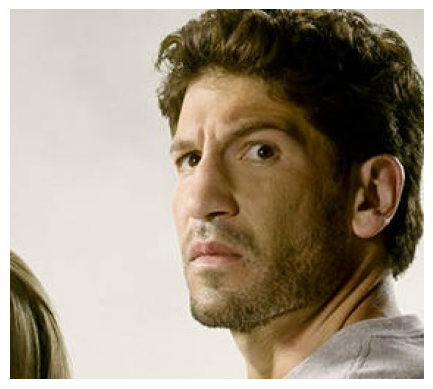

In [78]:
ref = db.reference('/')
detected_faces= "/content/detected-faces/"
files = os.listdir(detected_faces)




for i in range(amount_of_data):
  image_data_base64 = ref.child('photo').child('data'+str(i+1)).get()
  image_data = base64.b64decode(image_data_base64)
  img = Image.open(io.BytesIO(image_data))
  plt.imshow(img)
  plt.axis('off')
  plt.savefig('/content/face_to_detect/face_to_detect.png', bbox_inches='tight')
  for faces in files:
    result = DeepFace.verify(img1_path="/content/face_to_detect/face_to_detect.png", img2_path="/content/detected-faces/"+faces, enforce_detection=False)

    if result['verified']==True:
      new_name=faces.split('.')[0]
      ref.child(custom_key).child(new_name).set(image_base64)
      print(result['verified'])
    print(result['verified'])